Importing the dataset

In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from statistics import mean
from sklearn.impute import SimpleImputer

df = pd.read_csv('Titanic dataset.csv')

In [456]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


Exploratory analysis

In [457]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [458]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [460]:
print(df.shape)

(1309, 11)


Missing value

In [461]:
print(df.isnull().sum())

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64


Visualization

In [462]:
df['sex'] = df['sex'].replace(["female", "male"], [0, 1])
df['embarked'] = df['embarked'].replace(["S", "C", "Q"], [1, 2, 3])

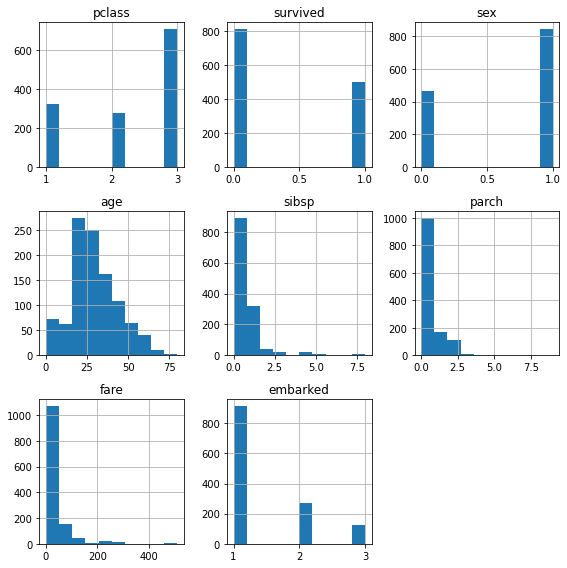

In [463]:
df.hist(figsize=(8,8))
plt.tight_layout()
plt.show()

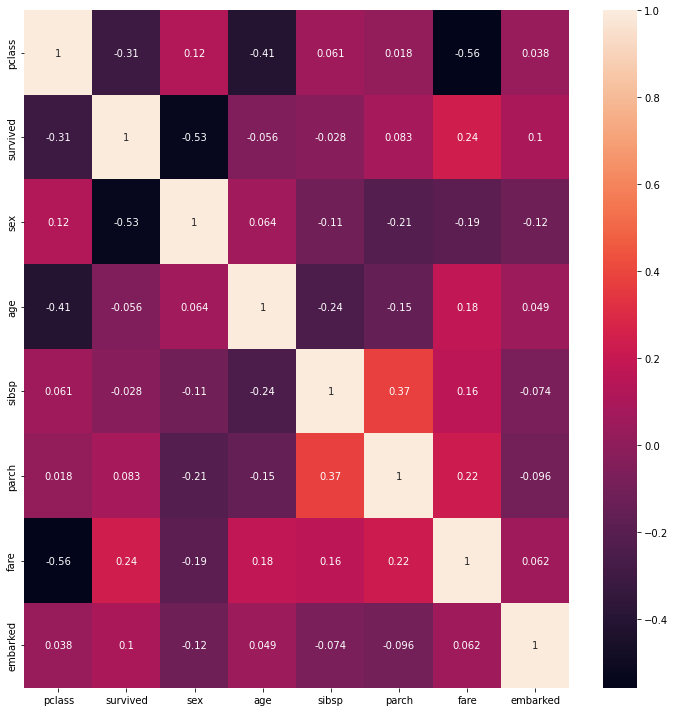

In [464]:
corr = df.corr()           
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.tight_layout()
plt.show()

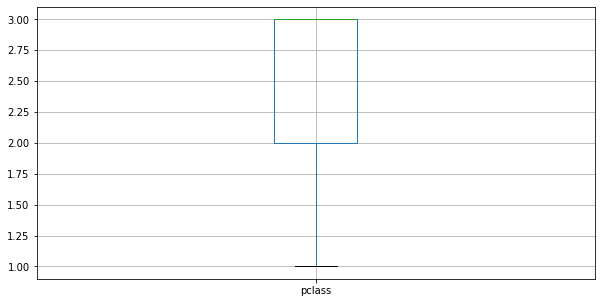

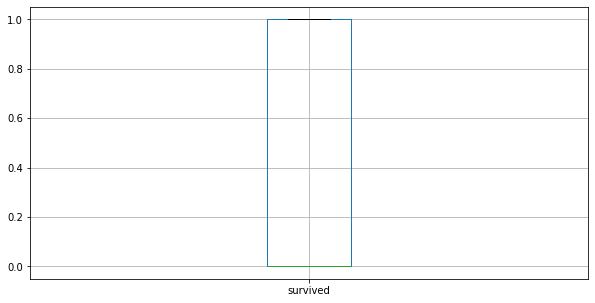

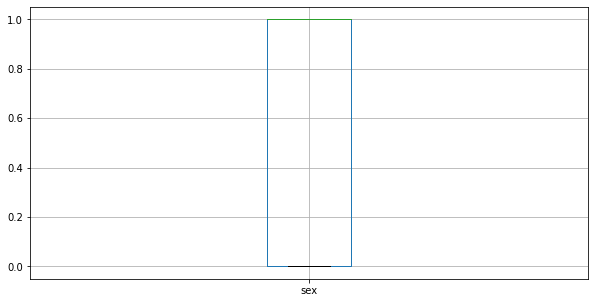

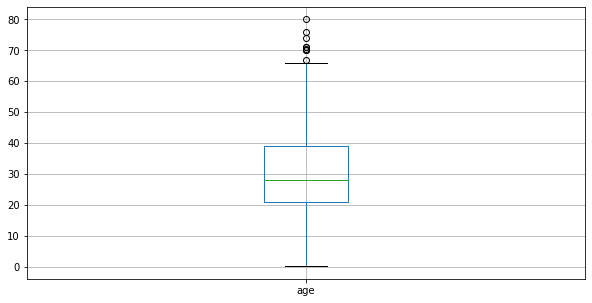

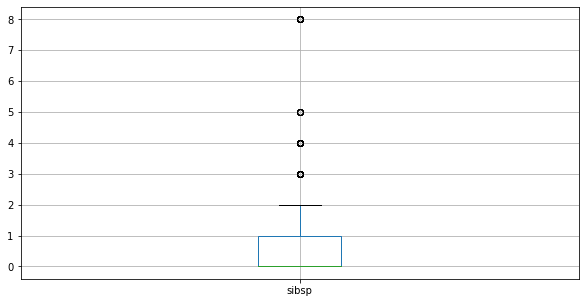

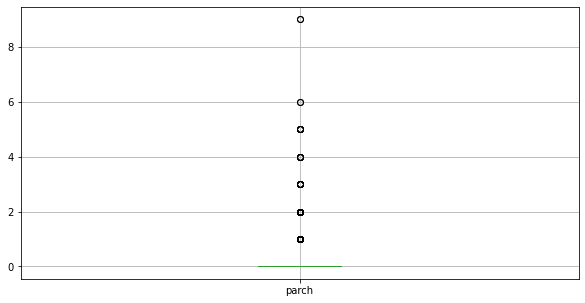

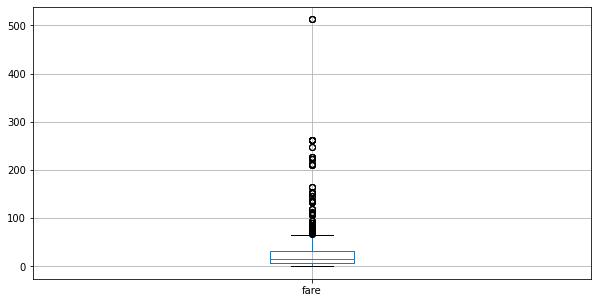

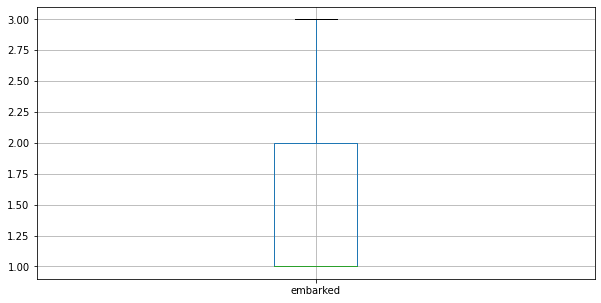

In [465]:
data1=df.select_dtypes(exclude=['object'])
for column in data1:
  plt.figure(figsize=(10,5))
  data1.boxplot([column])

Remove column

In [466]:
df.drop(['ticket','pclass','cabin','name'],axis=1,inplace=True)
df.head(5)

,survived,sex,age,sibsp,parch,fare,embarked
0,1,0,29.0000,0,0,211.3375,1.0
1,1,1,0.9167,1,2,151.5500,1.0
2,0,0,2.0000,1,2,151.5500,1.0
3,0,1,30.0000,1,2,151.5500,1.0
4,0,0,25.0000,1,2,151.5500,1.0


In [467]:
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df1=df.copy()
df1=imp.fit_transform(df1)
df1=pd.DataFrame(df1,columns=df.columns)

df1

,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,0.0,29.0000,0.0,0.0,211.3375,1.0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1.0
2,0.0,0.0,2.0000,1.0,2.0,151.5500,1.0
3,0.0,1.0,30.0000,1.0,2.0,151.5500,1.0
4,0.0,0.0,25.0000,1.0,2.0,151.5500,1.0
...,...,...,...,...,...,...,...
1304,0.0,0.0,14.5000,1.0,0.0,14.4542,2.0
1305,0.0,0.0,24.0000,1.0,0.0,14.4542,2.0
1306,0.0,1.0,26.5000,0.0,0.0,7.2250,2.0
1307,0.0,1.0,27.0000,0.0,0.0,7.2250,2.0


In [468]:
#df1.drop(['ticket','pclass','cabin','name'],axis=1,inplace=True)
#df1.head(5)

In [469]:
print(df.shape)

(1309, 7)


Outlier

In [470]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [471]:
outlier_cols = ["fare"] 
for col in outlier_cols:
  l,u = outlier_treatment(df1[col])
  #print(l,u)
  data2 = df1[ (df1[col] > u) | (df1[col] < l) ]
  df1.drop(data2.index , inplace=True)
df1.shape

(1138, 7)

Train and Test

In [472]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df,Y_target,test_size=0.3)

In [473]:
#df.age =df.age.fillna(df.age.mean())
#df.head()

In [474]:
X_feature = df1.loc[:, df1.columns != 'survived']
Y_target = df1.loc[:, df1.columns == 'survived']

print(X_feature.shape)
print(Y_target.shape)

(1138, 6)
(1138, 1)


In [475]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_target, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(910, 6)
(228, 6)
(910, 1)
(228, 1)


In [477]:
len(X_train)

910

In [478]:
len(Y_train)

910

In [479]:
len(df)

1309

In [480]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [481]:
model.fit(X_train,Y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [482]:
model.score(X_test,Y_test)

0.7368421052631579

In [483]:
model.predict(X_test[:10])

array([1., 0., 1., 1., 0., 0., 1., 0., 1., 0.])

In [484]:
model.predict(Y_test[:10])

array([1., 1., 0., 0., 1., 1., 0., 0., 1., 0.])

In [490]:
Y_pred = model.predict(X_test)

In [491]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7368421052631579


In [493]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

ps = precision_score(Y_test, y_pred)
print("Precision Score : ",ps)

rs = recall_score(Y_test, y_pred)
print("Recall Score : ",rs)

fs = f1_score(Y_test, y_pred)
print("F1 Score ",fs)

Precision Score :  0.6024096385542169
Recall Score :  0.6493506493506493
F1 Score  0.6250000000000001


In [492]:
print(metrics.confusion_matrix(Y_test, Y_pred))

[[118  33]
 [ 27  50]]
